In [1]:
import pandas as pd

with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
business_df = pd.read_json(data_json_str)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Noise Level': 'average', 'Waiter Service': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{'Accepts Credit Cards': True, 'Happy Hour': T...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
4,"{'Accepts Credit Cards': False, 'Price Range':...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Friday': {'close': '17:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business


In [2]:
with open('yelp_academic_dataset_tip.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
tip_df = pd.read_json(data_json_str)
tip_df.head()

,business_id,date,likes,text,type,user_id
0,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
2,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ
3,KayYbHCt-RkbGcPdGOThNg,2015-07-08,0,"Friendly staff, good food, great beer selectio...",tip,QawZN4PSW7ng_9SP7pjsVQ
4,1_lU0-eSWJCRvNGk78Zh9Q,2015-10-25,0,Beautiful restoration.,tip,MLQre1nvUtW-RqMTc4iC9A


In [3]:
agg = tip_df.groupby('business_id').size()

def add_tip_count(row):
    if row['business_id'] in agg:
        return agg[row['business_id']]
    else:
        return 0
    
business_df['tip_count'] = business_df.apply (lambda row: add_tip_count(row),axis=1)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,tip_count
0,"{'Noise Level': 'average', 'Waiter Service': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business,0
1,"{'Accepts Credit Cards': True, 'Happy Hour': T...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business,0
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business,0
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,1
4,"{'Accepts Credit Cards': False, 'Price Range':...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Friday': {'close': '17:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business,0


In [4]:
#lat-lng borders in [N,E,S,W] order
city_borders = {'Las Vegas':[36.721753, -114, 35.36, -116.32],
               'Phoenix':[34.85,-110.14,31.81,-113.86],
               'Charlotte':[35.52,-80.14,34.84,-81.21],
               'Pittsburgh':[40.76,-79.32,40.08,-80.5],
               'Urbana-Champaign':[40.72,-87.27,39.33,-89.4],
               'Madison':[43.3,-88.87,42.63,-90.11],
               'Edinburgh':[56.03,-2.94,55.79,-3.47],
               'Karlsruhe':[49.11,8.74,48.8,8.19],
               'Montreal':[45.76,-73.06,45.21,-74.16],
               'Waterloo':[43.74,-80.07,43.06,-81.36]}

def get_clean_city(row):
    for k,v in city_borders.items():
        if row.latitude < v[0] and row.latitude > v[2] and row.longitude < v[1] and row.longitude > v[3]:
            return k
        
def get_attr_count(row):
    return len(row['attributes'].keys())
        
business_df['clean_city'] = business_df.apply (lambda row: get_clean_city(row),axis=1)
business_df['attribute_count'] = business_df.apply(lambda row: get_attr_count(row), axis=1)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,tip_count,clean_city,attribute_count
0,"{'Noise Level': 'average', 'Waiter Service': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business,0,Pittsburgh,18
1,"{'Accepts Credit Cards': True, 'Happy Hour': T...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business,0,Pittsburgh,5
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business,0,Pittsburgh,0
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,1,Pittsburgh,1
4,"{'Accepts Credit Cards': False, 'Price Range':...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Friday': {'close': '17:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business,0,Pittsburgh,3


In [5]:
category_map = {'Active Life': 0, 
                   'Arts & Entertainment': 1,
                   'Automotive': 2,
                   'Beauty & Spas': 3,
                   'Education': 4,
                   'Event Planning & Services': 5,
                   'Financial Services': 6,
                   'Food': 7,
                   'Health & Medical': 8,
                   'Home Services': 9,
                   'Hotels & Travel': 10,
                   'Local Flavor': 11,
                   'Local Services': 12,
                   'Mass Media': 13,
                   'Nightlife': 14,
                   'Pets': 15,
                   'Professional Services': 16,
                   'Public Services & Government': 17,
                   'Real Estate': 18,
                   'Religious Organizations': 19,
                   'Restaurants': 20,
                   'Shopping': 21}

def get_top_category(row):
    for cat in row['categories']:
        if cat in category_map:
            return cat
    return "N/A"

business_df['top_level_category'] = business_df.apply (lambda row: get_top_category(row),axis=1)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,tip_count,clean_city,attribute_count,top_level_category
0,"{'Noise Level': 'average', 'Waiter Service': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business,0,Pittsburgh,18,Restaurants
1,"{'Accepts Credit Cards': True, 'Happy Hour': T...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business,0,Pittsburgh,5,Nightlife
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business,0,Pittsburgh,0,Automotive
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,1,Pittsburgh,1,Active Life
4,"{'Accepts Credit Cards': False, 'Price Range':...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Friday': {'close': '17:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business,0,Pittsburgh,3,Shopping


In [6]:
dummies = pd.get_dummies(business_df['top_level_category'])
final_df = pd.concat([business_df, dummies], axis=1, join='inner')
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Mass Media,N/A,Nightlife,Pets,Professional Services,Public Services & Government,Real Estate,Religious Organizations,Restaurants,Shopping
0,"{'Noise Level': 'average', 'Waiter Service': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"{'Accepts Credit Cards': True, 'Happy Hour': T...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"{'Accepts Credit Cards': False, 'Price Range':...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Friday': {'close': '17:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
with open('yelp_academic_dataset_checkin.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
checkin_df = pd.read_json(data_json_str)
checkin_df.head()

,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{'14-6': 1, '18-4': 1, '13-0': 1, '13-3': 1, '...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{'9-4': 3, '17-4': 1, '10-5': 1, '13-1': 1, '1...",checkin
2,KayYbHCt-RkbGcPdGOThNg,"{'14-0': 1, '17-5': 1, '16-3': 1, '13-3': 2, '...",checkin
3,b12U9TFESStdy7CsTtcOeg,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin
4,QoDa50dc7g62xciFygXB9w,"{'12-1': 1, '9-3': 1, '15-1': 1, '16-0': 1, '1...",checkin


In [8]:
final_df = pd.merge(final_df,checkin_df,on="business_id")
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Nightlife,Pets,Professional Services,Public Services & Government,Real Estate,Religious Organizations,Restaurants,Shopping,checkin_info,type_y
0,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'14-6': 1, '18-4': 1, '13-0': 1, '13-3': 1, '...",checkin
1,"{'Waiter Service': True, 'Accepts Credit Cards...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{'Friday': {'close': '20:00', 'open': '10:00'}...",40.413464,-79.880247,Emil's Lounge,[],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'9-4': 3, '17-4': 1, '10-5': 1, '13-1': 1, '1...",checkin
2,"{'Waiter Service': True, 'Accepts Credit Cards...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Friday': {'close': '02:00', 'open': '11:00'}...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'14-0': 1, '17-5': 1, '16-3': 1, '13-3': 2, '...",checkin
3,{},b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Friday': {'close': '19:00', 'open': '07:30'}...",40.394588,-80.084454,Flynn's Tire And Auto Service,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin
4,{},QoDa50dc7g62xciFygXB9w,"[Veterinarians, Pets]",Pittsburgh,"2080 Greentree Rd\nPittsburgh, PA 15220",{},40.392207,-80.069134,Greentree Animal Clinic,[],...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'12-1': 1, '9-3': 1, '15-1': 1, '16-0': 1, '1...",checkin


In [9]:
def get_multihour_pop(row, startHr,endHr):
    checkins = row['checkin_info']
    freq = 0
    for x in range(startHr, endHr):
        for k,v in checkins.items():
            hr = int(k.split('-')[0])
            if hr == x:
                freq += v
    return freq

final_df['0-6_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 0, 6),axis=1)
final_df['6-12_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 6, 12),axis=1)
final_df['12-18_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 12, 18),axis=1)
final_df['18-24_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 18, 24),axis=1)
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Real Estate,Religious Organizations,Restaurants,Shopping,checkin_info,type_y,0-6_checkins,6-12_checkins,12-18_checkins,18-24_checkins
0,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],...,0.0,0.0,0.0,0.0,"{'14-6': 1, '18-4': 1, '13-0': 1, '13-3': 1, '...",checkin,0,3,5,1
1,"{'Waiter Service': True, 'Accepts Credit Cards...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{'Friday': {'close': '20:00', 'open': '10:00'}...",40.413464,-79.880247,Emil's Lounge,[],...,0.0,0.0,0.0,0.0,"{'9-4': 3, '17-4': 1, '10-5': 1, '13-1': 1, '1...",checkin,0,9,12,2
2,"{'Waiter Service': True, 'Accepts Credit Cards...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Friday': {'close': '02:00', 'open': '11:00'}...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],...,0.0,0.0,0.0,0.0,"{'14-0': 1, '17-5': 1, '16-3': 1, '13-3': 2, '...",checkin,0,17,29,9
3,{},b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Friday': {'close': '19:00', 'open': '07:30'}...",40.394588,-80.084454,Flynn's Tire And Auto Service,[],...,0.0,0.0,0.0,0.0,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin,4,1,0,0
4,{},QoDa50dc7g62xciFygXB9w,"[Veterinarians, Pets]",Pittsburgh,"2080 Greentree Rd\nPittsburgh, PA 15220",{},40.392207,-80.069134,Greentree Animal Clinic,[],...,0.0,0.0,0.0,0.0,"{'12-1': 1, '9-3': 1, '15-1': 1, '16-0': 1, '1...",checkin,0,1,4,0


In [10]:
from sklearn.decomposition import PCA
import numpy as np

X = final_df[['latitude','longitude','0-6_checkins','6-12_checkins','12-18_checkins','18-24_checkins','review_count','tip_count','attribute_count']]

X_norm = (X - X.mean()) / X.std()
pca = PCA(n_components=3)
pca.fit(X_norm)
print(pca.explained_variance_ratio_)
i = np.identity(X_norm.shape[1])
coef = pca.transform(i)
pd.DataFrame(coef, columns=['PC-1', 'PC-2', 'PC-3'], index=X.columns)

[ 0.5056062   0.21033566  0.11436198]


,PC-1,PC-2,PC-3
latitude,-0.045969,0.692523,-0.110107
longitude,-0.057518,0.691534,-0.112912
0-6_checkins,0.343857,0.051551,-0.243672
6-12_checkins,0.381122,0.028725,-0.256128
12-18_checkins,0.439383,0.012504,-0.112496
18-24_checkins,0.436820,0.011927,-0.022166
review_count,0.374172,0.022243,0.271533
tip_count,0.443929,0.009744,0.089767
attribute_count,0.100698,0.194481,0.869031


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoCV

X = final_df[['latitude','longitude','0-6_checkins','6-12_checkins','12-18_checkins','18-24_checkins','review_count','tip_count','attribute_count','Active Life',
       'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Education',
       'Event Planning & Services', 'Financial Services', 'Food',
       'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
       'Local Services', 'Mass Media', 'N/A', 'Nightlife', 'Pets',
       'Professional Services', 'Public Services & Government', 'Real Estate',
       'Religious Organizations', 'Restaurants', 'Shopping']]
y = final_df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LassoCV()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.06679762508843845

In [12]:
def get_bin_stars(row):
    if row['stars'] > 2.5:
        return 1
    else:
        return 0

def get_rounded_stars(row):
    if row['stars'] < 1.5:
        return 1
    elif row['stars'] < 2.5:
        return 2
    elif row['stars'] < 3.5:
        return 3
    elif row['stars'] < 4.5:
        return 4
    else:
        return 5
    
final_df['stars_01'] = final_df.apply (lambda row: get_bin_stars(row),axis=1)
final_df['stars_rounded'] = final_df.apply (lambda row: get_rounded_stars(row),axis=1)
final_df['stars_clean_ints'] = (final_df['stars']*2) - 1

In [13]:
final_df.groupby('stars_clean_ints').size()

stars_clean_ints
1.0      206
2.0      970
3.0     2319
4.0     4799
5.0     8187
6.0    12260
7.0    13042
8.0     9164
9.0     4622
dtype: int64

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix


y = final_df['stars_01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score: ", score)
confusion_matrix(y_test, y_pred)

Binary Good Bad (>2.5=good) Score:  0.843548914822


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[   15,  2757],
       [  112, 15454]])

In [15]:
y = final_df['stars_rounded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score: ", score)
confusion_matrix(y_test, y_pred)

Rounded Stars Score:  0.35145599302


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[   0,    0,    0,   47,   15],
       [   4,    0,    0,  729,  328],
       [  41,    0,    0, 2590, 1694],
       [ 117,    0,    1, 3924, 4297],
       [  40,    0,    1, 1989, 2521]])

In [16]:
y = final_df['stars_clean_ints']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score: ", score)
confusion_matrix(y_test, y_pred)

Rounded Stars Score:  0.144454138946


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[   0,    0,    0,    3,    5,   52,    2,    0,    0],
       [   0,    0,    0,   56,   35,  211,   11,    5,    0],
       [   0,    0,    4,  187,  133,  376,   33,   10,    0],
       [   0,    0,    1,  434,  348,  746,   73,   46,    1],
       [   0,    0,    9,  878,  692,  865,  113,  115,    4],
       [   0,    0,    4, 1396, 1081, 1149,  194,  222,   11],
       [   0,    0,   11, 1524,  982, 1246,  207,  292,   20],
       [   0,    2,    5, 1130,  468, 1124,  159,  158,    8],
       [   0,    0,    7,  387,  113,  881,   84,   20,    5]])

In [17]:
y_test.value_counts()

7.0    4282
6.0    4057
8.0    3054
5.0    2676
4.0    1649
9.0    1497
3.0     743
2.0     318
1.0      62
Name: stars_clean_ints, dtype: int64

## Now to just look at Phoenix

In [18]:
phoenix = final_df[final_df['clean_city'] == 'Phoenix']
phoenix.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Shopping,checkin_info,type_y,0-6_checkins,6-12_checkins,12-18_checkins,18-24_checkins,stars_01,stars_rounded,stars_clean_ints
1577,"{'Accepts Credit Cards': True, 'Price Range': ...",KyXO7gXGVdpPJ1enxIf3Ig,"[Hotels & Travel, Event Planning & Services, H...",Glendale,"14071 E Iliff Ave\nGlendale, AZ 85308","{'Friday': {'close': '00:00', 'open': '00:00'}...",33.638630,-112.179234,Comfort Inn Denver Southeast Area,[],...,0.0,"{'17-2': 1, '10-2': 1, '20-1': 1, '21-6': 1, '...",checkin,0,1,2,3,0,2,3.0
1578,"{'Noise Level': 'loud', 'Has TV': False, 'Outd...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004","{'Friday': {'close': '02:00', 'open': '10:00'}...",33.479482,-112.073681,Domino's Pizza,[],...,0.0,"{'12-6': 1, '22-5': 1, '23-6': 1, '18-6': 2, '...",checkin,0,1,4,8,0,3,4.0
1579,"{'Noise Level': 'quiet', 'Take-out': True, 'Ta...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468547,-112.075085,Viad Tower Restaurants,[],...,0.0,"{'12-6': 1, '12-1': 6, '9-4': 1, '11-4': 3, '1...",checkin,0,9,106,1,1,4,6.0
1580,"{'Waiter Service': False, 'Accepts Credit Card...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '03:00', 'open': '09:00'}...",33.448399,-112.071702,Sky Lounge,[],...,0.0,"{'20-4': 2, '22-5': 4, '1-6': 5, '14-5': 1, '2...",checkin,15,0,6,35,0,3,4.0
1581,"{'Noise Level': 'very_loud', 'Accepts Credit C...",SiwN7f0N4bs4ZtPc4yPgiA,"[Bars, Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.455885,-112.074177,Palazzo,[],...,0.0,"{'20-4': 1, '18-3': 1, '22-5': 1, '21-5': 1, '...",checkin,8,1,0,42,1,3,5.0


In [106]:
from sklearn.linear_model import SGDClassifier


def per_class_accuracy(arr):
    class_accs = []
    for i in range(arr.shape[0]):
        true = arr[i][i]
        row_sum = sum(arr[i])
        class_accs.append(true/row_sum)
    return sum(class_accs)/len(class_accs)

X = phoenix[['0-6_checkins','6-12_checkins','12-18_checkins','18-24_checkins','review_count','tip_count','attribute_count']]
y = phoenix['stars_01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2", n_iter=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Binary Good Bad (>2.5=good) Score:  0.817525083612
[[  49 1208]
 [ 156 6062]]
Per-class Acc: 0.506946624794


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


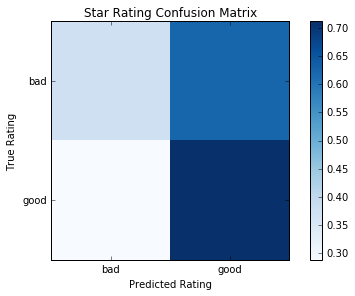

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

#classes = [1,2,3,4,5]
classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [59]:
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score SVC: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Binary Good Bad (>2.5=good) Score SVC:  0.831170568562
[[  10 1247]
 [  15 6203]]
Per-class Acc: 0.502771549122


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [71]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score LogisticReg: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Binary Good Bad (>2.5=good) Score LogisticReg:  0.83143812709
[[   0 1257]
 [   3 6215]]
Per-class Acc: 0.499758764876


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


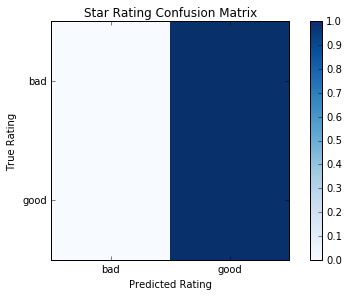

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

#classes = [1,2,3,4,5]
classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score DecisionTree: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Binary Good Bad (>2.5=good) Score DecisionTree:  0.730568561873
[[ 338  919]
 [1095 5123]]
Per-class Acc: 0.546396276062


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


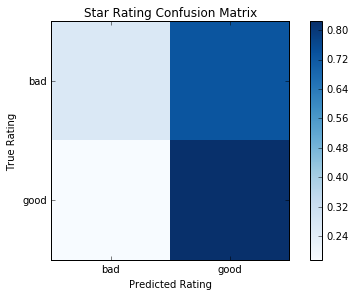

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

#classes = [1,2,3,4,5]
classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [24]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Binary Good Bad (>2.5=good) Score SVC: ", score)
confusion_matrix(y_test, y_pred)

Binary Good Bad (>2.5=good) Score SVC:  0.831170568562


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[  10, 1247],
       [  15, 6203]])

In [83]:
y = phoenix['stars_rounded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2", n_iter=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Rounded Stars Score:  0.400936454849
[[   0    0   14    0   19]
 [   2    0  187   47  295]
 [   2    0  500  407  860]
 [   7    0  540 1089 1569]
 [   7    0  310  212 1408]]
Per-class Acc: 0.269864883508


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[   0    0   14    0   19]
 [   2    0  187   47  295]
 [   2    0  500  407  860]
 [   7    0  540 1089 1569]
 [   7    0  310  212 1408]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


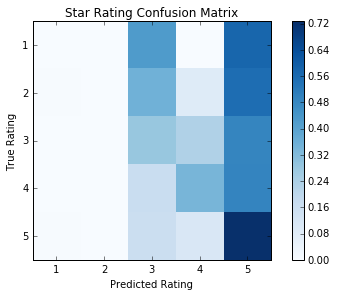

In [84]:
def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

classes = [1,2,3,4,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score LogisticReg: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


Rounded Stars Score LogisticReg:  0.446421404682
[[   0    0    0   25    8]
 [   0    0    0  401  130]
 [   0    0    1 1500  268]
 [   0    1    9 2788  407]
 [   0    1    1 1387  548]]
Per-class Acc: 0.230673561182


In [27]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=40)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score KMeans: ", score)
confusion_matrix(y_test, y_pred)

Rounded Stars Score KMeans:  -1104934646.63


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[  0,   0,   0, ...,   0,   0,   0],
       [ 31,   0,   0, ...,   0,   0,   0],
       [409,   0,   0, ...,   0,   3,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [75]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score DecisionTree: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Rounded Stars Score DecisionTree:  0.385685618729
[[   0    9    7   12    5]
 [   5   71  158  164  133]
 [   7  140  552  725  345]
 [  11  193  739 1569  693]
 [   8  135  375  728  691]]
Per-class Acc: 0.258407097308


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[   0    9    7   12    5]
 [   5   71  158  164  133]
 [   7  140  552  725  345]
 [  11  193  739 1569  693]
 [   8  135  375  728  691]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


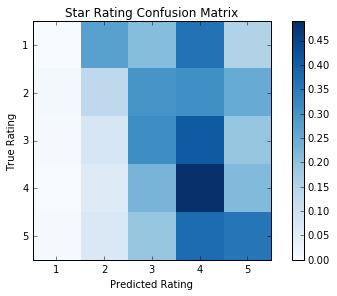

In [29]:
def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

classes = [1,2,3,4,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [85]:
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score SVC: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Rounded Stars Score SVC:  0.448695652174
[[   0    0    2   22    9]
 [   0    5   44  381  101]
 [   0    4   98 1416  251]
 [   0    2  119 2699  385]
 [   0    4   52 1329  552]]
Per-class Acc: 0.238382635833


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[   0    0    2   22    9]
 [   0    5   44  381  101]
 [   0    4   98 1416  251]
 [   0    2  119 2699  385]
 [   0    4   52 1329  552]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


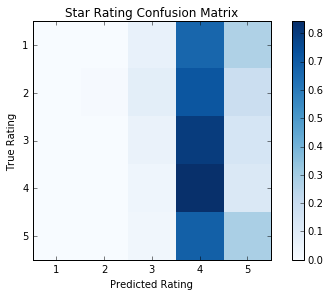

In [86]:
def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(9)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')

classes = [1,2,3,4,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

[[   0    0    2   22    9]
 [   0    5   44  381  101]
 [   0    4   98 1416  251]
 [   0    2  119 2699  385]
 [   0    4   52 1329  552]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


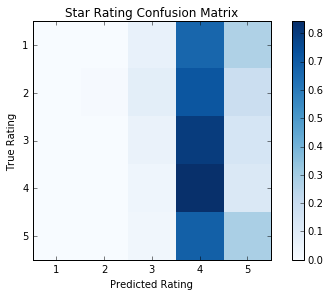

In [31]:
classes = [1,2,3,4,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [103]:
y = phoenix['stars_clean_ints']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Real Stars Score: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Real Stars Score:  0.224214046823
[[  0   2   4   1   8   4   1   8   5]
 [  6   1  23   2  26  21  28  46  19]
 [  1   4  32   1  50  52  87 115  17]
 [  2   8  74  10  80 133 188 174  24]
 [  2   5  68   3 105 190 352 320  31]
 [  5   3 101   9 103 303 587 391  30]
 [ 13   6  86   8 116 215 722 475  32]
 [ 11  15  64  11  84 108 440 464  24]
 [ 16   4  88   7  67  30 152 313  39]]
Per-class Acc: 0.14119894507


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[  0   2   4   1   8   4   1   8   5]
 [  6   1  23   2  26  21  28  46  19]
 [  1   4  32   1  50  52  87 115  17]
 [  2   8  74  10  80 133 188 174  24]
 [  2   5  68   3 105 190 352 320  31]
 [  5   3 101   9 103 303 587 391  30]
 [ 13   6  86   8 116 215 722 475  32]
 [ 11  15  64  11  84 108 440 464  24]
 [ 16   4  88   7  67  30 152 313  39]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


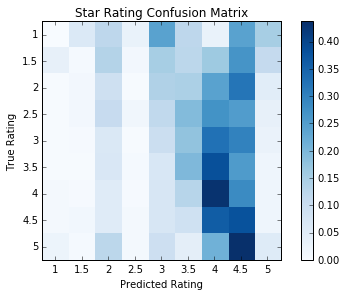

In [104]:
def plot_confusion_matrix(cm, cls, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(9)
    plt.xticks(tick_marks, cls, rotation=0)
    plt.yticks(tick_marks, cls)
    plt.tight_layout()
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')


classes = [1,1.5,2,2.5,3,3.5,4,4.5,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [101]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Real Stars Score: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Real Stars Score:  0.207491638796
[[  0   2   6   5   3   5   5   3   4]
 [  3  12  14  21  25  31  23  19  24]
 [  3  11  34  48  55  69  64  41  34]
 [  2  28  50 102 122 142 107  92  48]
 [  1  24  66 112 216 211 223 140  83]
 [  7  35  60 154 261 373 325 209 108]
 [  5  21  63 137 276 360 427 256 128]
 [  5  20  59  94 165 217 257 255 149]
 [  5  23  35  49  73 134 112 153 132]]
Per-class Acc: 0.156034451721


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[  0   2   6   5   3   5   5   3   4]
 [  3  12  14  21  25  31  23  19  24]
 [  3  11  34  48  55  69  64  41  34]
 [  2  28  50 102 122 142 107  92  48]
 [  1  24  66 112 216 211 223 140  83]
 [  7  35  60 154 261 373 325 209 108]
 [  5  21  63 137 276 360 427 256 128]
 [  5  20  59  94 165 217 257 255 149]
 [  5  23  35  49  73 134 112 153 132]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


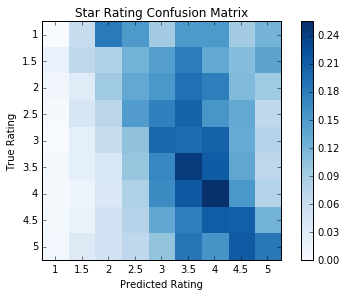

In [102]:
classes = [1,1.5,2,2.5,3,3.5,4,4.5,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [89]:
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Rounded Stars Score SVC: ", score)
conf = confusion_matrix(y_test, y_pred)
print(conf)
print("Per-class Acc:",per_class_accuracy(conf))

Rounded Stars Score SVC:  0.24
[[   0    0    0    0    4    9    8    5    7]
 [   0    0    0    7   10   45   67   12   31]
 [   0    0    3    6   24   72  201   24   29]
 [   0    0    0   15   26  144  402   44   62]
 [   0    0    3   11   48  146  729   63   76]
 [   0    0    1   16   58  193 1096   84   84]
 [   0    0    2   12   46  172 1245   97   99]
 [   0    0    0   11   27  171  747  133  132]
 [   0    1    1    9   18  119  311  100  157]]
Per-class Acc: 0.141440371455


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


[[   0    0    0    0    4    9    8    5    7]
 [   0    0    0    7   10   45   67   12   31]
 [   0    0    3    6   24   72  201   24   29]
 [   0    0    0   15   26  144  402   44   62]
 [   0    0    3   11   48  146  729   63   76]
 [   0    0    1   16   58  193 1096   84   84]
 [   0    0    2   12   46  172 1245   97   99]
 [   0    0    0   11   27  171  747  133  132]
 [   0    1    1    9   18  119  311  100  157]]


/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


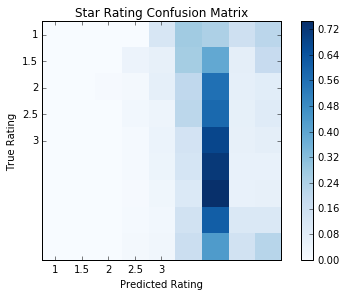

In [90]:
classes = [1,1.5,2,2.5,3,3.5,4,4.5,5]
#classes = ['bad','good']
cm = confusion_matrix(y_test,y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)
print(cm)

plt.figure()
plot_confusion_matrix(cm_normalized, classes, title='Star Rating Confusion Matrix')

plt.show()

In [32]:
y_test.value_counts()

4    3205
5    1937
3    1769
2     531
1      33
Name: stars_rounded, dtype: int64

### Location, Location, Location
Disregarding all attributes besides latitude and longitude leads to almost the exact same results for SGD and Logistic regression both for binary and multinomial predictors.

In [ ]:
business_df.groupby('clean_city').size()

In [102]:
32616+21239

53855

In [104]:
6434+3373+1067+21239+2804+4944+32616+3754+737+474

77442

In [105]:
53855/77442

0.6954236719092999

In [106]:
77442-3373-1067-4944-474

67584

In [107]:
67584/77442

0.8727047338653444

In [115]:
business_df.groupby('top_level_category').size()

top_level_category
Active Life                      2849
Arts & Entertainment             2011
Automotive                       3853
Beauty & Spas                    5595
Education                         478
Event Planning & Services         984
Financial Services                842
Food                             8871
Health & Medical                 4565
Home Services                    3778
Hotels & Travel                  2302
Local Flavor                      126
Local Services                   3295
Mass Media                        101
N/A                               260
Nightlife                        3984
Pets                             1451
Professional Services             691
Public Services & Government      382
Real Estate                       188
Religious Organizations           213
Restaurants                     20639
Shopping                         9987
dtype: int64

In [35]:
from bokeh.charts import HeatMap, output_file, show

hm = HeatMap(phoenix, x='longitude', y='latitude', values='stars')
output_file('heatmap.html')
show(hm)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.contour(phoenix['longitude'], phoenix['latitude'])
plt.show()

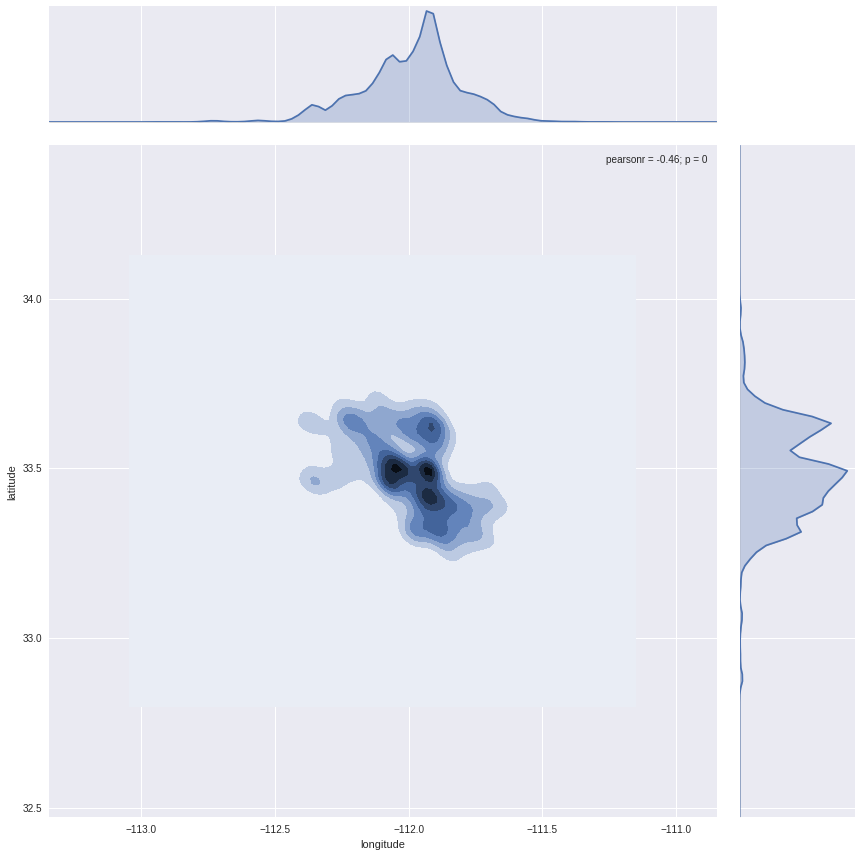

In [39]:
import numpy as np
import seaborn as sns
%matplotlib inline

sns.jointplot(phoenix['longitude'], phoenix['latitude'], kind="kde", size=12)

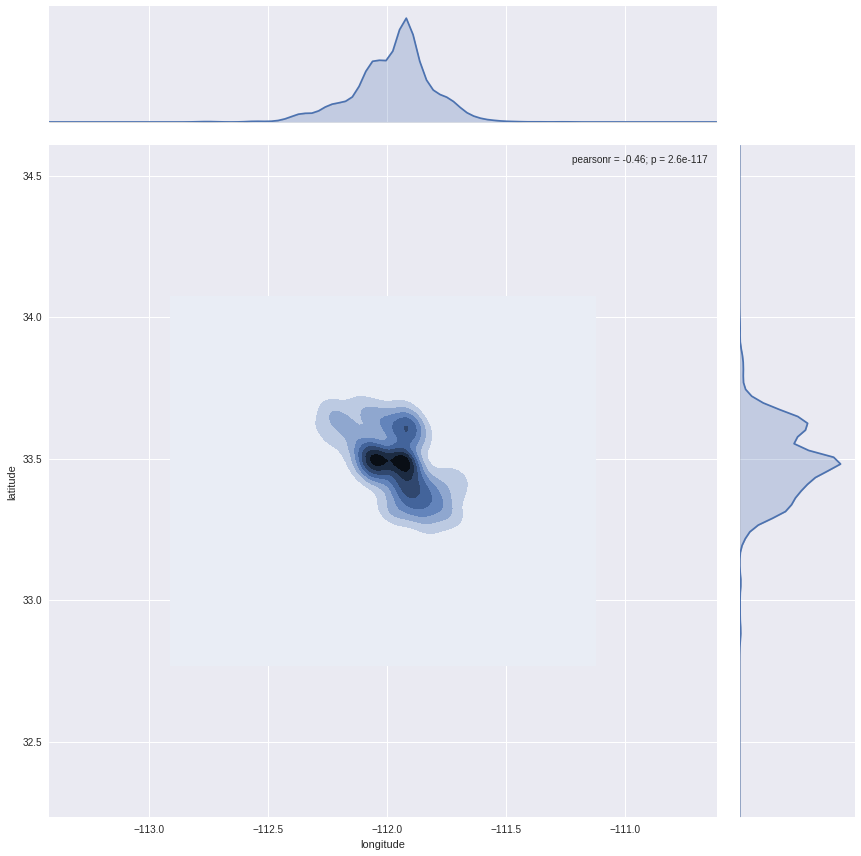

In [40]:
star_5 = phoenix[phoenix.stars == 5]
sns.jointplot(star_5['longitude'], star_5['latitude'], kind="kde", size=12)

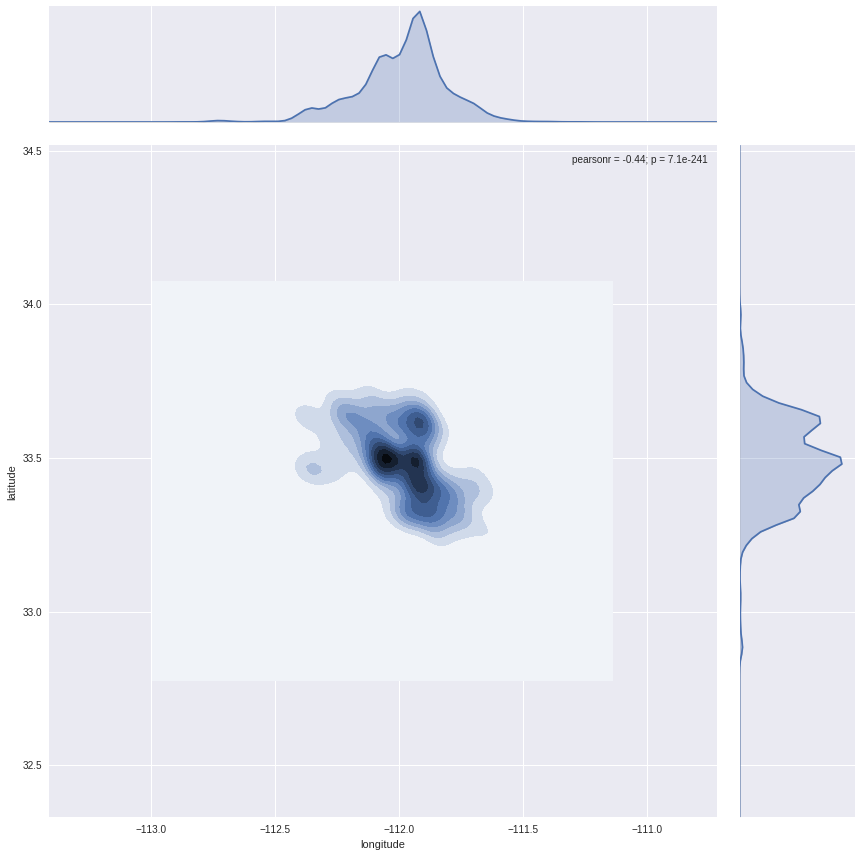

In [41]:
star_4 = phoenix[phoenix.stars == 4]
sns.jointplot(star_4['longitude'], star_4['latitude'], kind="kde", size=12)

In [47]:
import geoplotlib
from geoplotlib.utils import BoundingBox, DataAccessObject

data = pd.DataFrame({'lat':star_5['latitude'], 'lon':star_5['longitude']})
print(data.columns)
geoplotlib.kde(data, bw=5, cut_below=1e-4)
geoplotlib.set_bbox(BoundingBox.KBH)
geoplotlib.show()

Index(['lat', 'lon'], dtype='object')
no data in current view
no data in current view
no data in current view
('http://otile1.mqcdn.com/tiles/1.0.0/osm/20/558434/328113.png', HTTPError())
('http://otile4.mqcdn.com/tiles/1.0.0/osm/20/558439/328116.png', HTTPError())
('http://otile2.mqcdn.com/tiles/1.0.0/osm/20/558435/328116.png', HTTPError())
('http://otile3.mqcdn.com/tiles/1.0.0/osm/20/558438/328115.png', HTTPError())
('http://otile4.mqcdn.com/tiles/1.0.0/osm/20/558436/328112.png', HTTPError())
no data in current view
('http://otile4.mqcdn.com/tiles/1.0.0/osm/19/279222/164059.png', HTTPError())
('http://otile2.mqcdn.com/tiles/1.0.0/osm/19/279220/164055.png', HTTPError())
('http://otile2.mqcdn.com/tiles/1.0.0/osm/20/558437/328113.png', HTTPError())
no data in current view
('http://otile1.mqcdn.com/tiles/1.0.0/osm/17/69809/41013.png', HTTPError())
('http://otile2.mqcdn.com/tiles/1.0.0/osm/20/558441/328112.png', HTTPError())
('http://otile3.mqcdn.com/tiles/1.0.0/osm/20/558436/328114.png',

Traceback (most recent call last):
  File "/usr/local/lib/python3.4/dist-packages/geoplotlib/__init__.py", line 31, in _runapp
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/geoplotlib/core.py", line 312, in start
    pyglet.app.run()
  File "/usr/local/lib/python3.4/dist-packages/pyglet/app/__init__.py", line 143, in run
    event_loop.run()
  File "/usr/local/lib/python3.4/dist-packages/pyglet/app/base.py", line 136, in run
    self._run_estimated()
  File "/usr/local/lib/python3.4/dist-packages/pyglet/app/base.py", line 175, in _run_estimated
    if not platform_event_loop.step(estimate) and estimate != 0.0 and \
  File "/usr/local/lib/python3.4/dist-packages/pyglet/app/xlib.py", line 116, in step
    pending_devices, _, _ = select.select(self._select_devices, (), (), timeout)
KeyboardInterrupt
